**Task 5: Sales Forecasting and Trend Analysis Using Prophet in Python**

In [1]:
!pip install prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0gsehuv/rl2c9b7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0gsehuv/ayp1z2w0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34061', 'data', 'file=/tmp/tmpk0gsehuv/rl2c9b7x.json', 'init=/tmp/tmpk0gsehuv/ayp1z2w0.json', 'output', 'file=/tmp/tmpk0gsehuv/prophet_modelcl31moyv/prophet_model-20250215140805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📌 Model Evaluation Metrics:
✔ Mean Absolute Error (MAE): 1138.12
✔ Root Mean Squared Error (RMSE): 1404.29
✔ R² Score: 0.1454


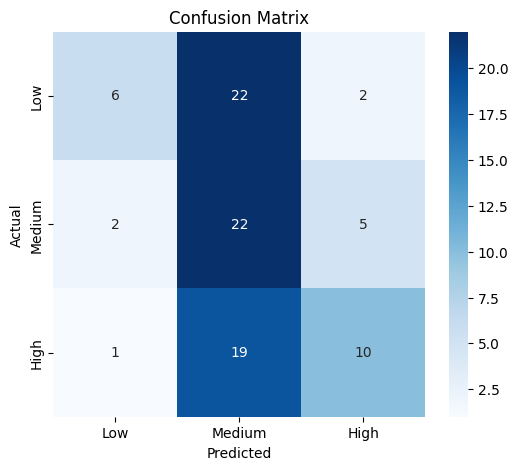


📌 Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.33      0.43        30
         Low       0.67      0.20      0.31        30
      Medium       0.35      0.76      0.48        29

    accuracy                           0.43        89
   macro avg       0.53      0.43      0.40        89
weighted avg       0.54      0.43      0.40        89



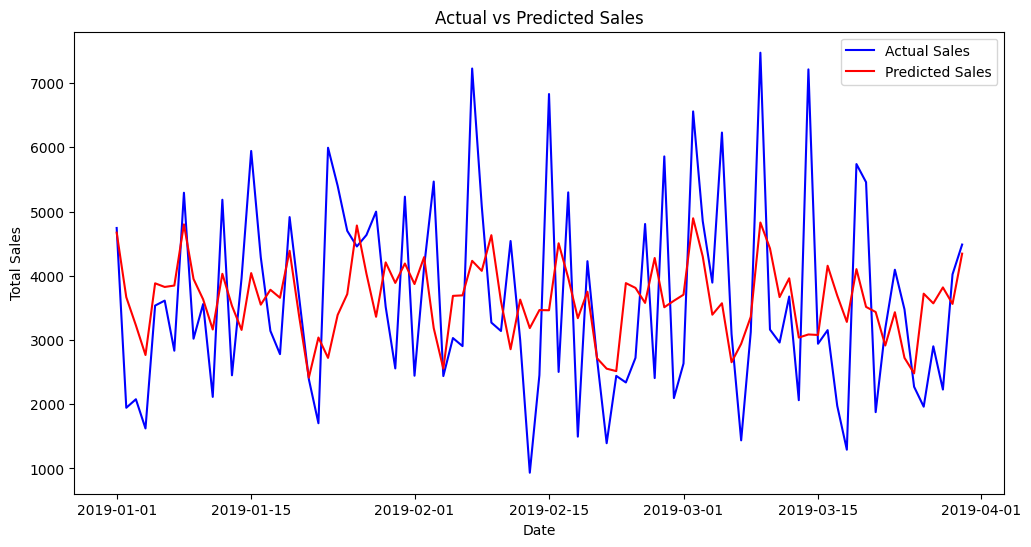

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

# Load dataset
file_path = "/content/supermarket_sales.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate total sales by date
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target

# Define Prophet model
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.05)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(daily_sales)

# Create future dataframe (next 60 days prediction)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# Model Evaluation
actual = daily_sales['y']
predicted = forecast['yhat'][:len(actual)]  # Match lengths

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"\n📌 Model Evaluation Metrics:")
print(f"✔ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✔ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✔ R² Score: {r2:.4f}")

# Define Sales Categories (Low, Medium, High) based on percentiles
low_threshold = np.percentile(actual, 33)
high_threshold = np.percentile(actual, 66)

def classify_sales(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

# Apply classification to actual and predicted sales
actual_classes = actual.apply(classify_sales)
predicted_classes = predicted.apply(classify_sales)

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_classes, predicted_classes, labels=["Low", "Medium", "High"])

# Display confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(actual_classes, predicted_classes)
print("\n📌 Classification Report:\n", class_report)

# Plot Actual vs Predicted Sales
plt.figure(figsize=(12,6))
plt.plot(daily_sales['ds'], actual, label='Actual Sales', color='blue')
plt.plot(daily_sales['ds'], predicted, label='Predicted Sales', color='red')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


**Task :2 Unemployment Rate Prediction in India using CatBoost Regression**

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


Dataset Preview:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Corrected Column Names: ['Region', 'Date', 'Frequency', 'Estim

<ipython-input-3-ca0ccb8f8daa>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-3-ca0ccb8f8daa>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])



Mean Absolute Error (MAE): 4.227129447314653
R² Score: 0.5837777145898086


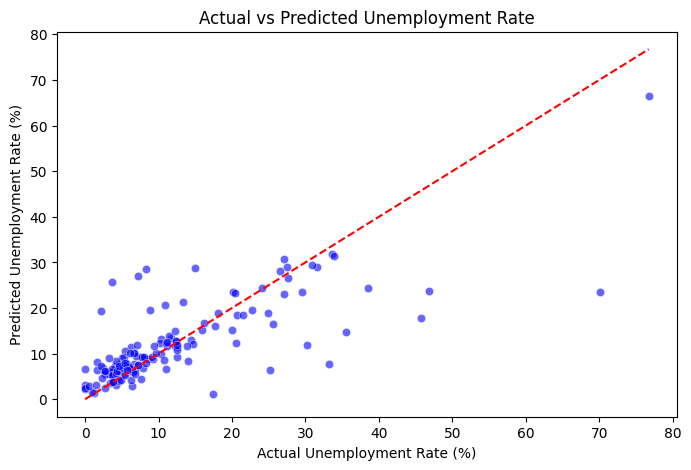

<ipython-input-3-ca0ccb8f8daa>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette="viridis")


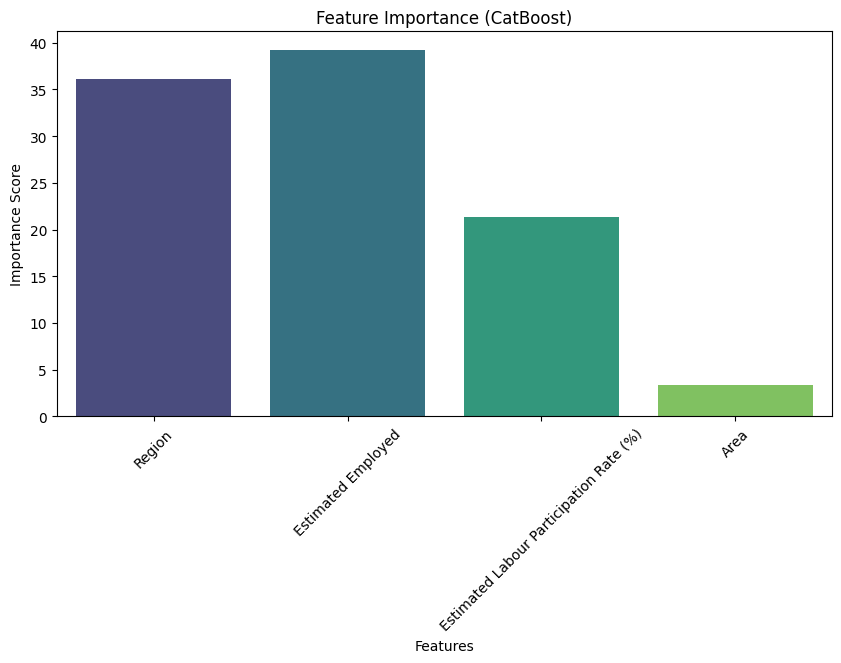

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = "/content/Unemployment in India.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:\n", df.head())

# Fix column names (remove extra spaces)
df.columns = df.columns.str.strip()
print("\nCorrected Column Names:", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop missing values
df = df.dropna()

# Convert categorical data (Region, Area) into numerical labels
label_encoders = {}
for col in ["Region", "Area"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define Features (X) and Target (Y)
X = df.drop(columns=["Estimated Unemployment Rate (%)", "Date", "Frequency"])
y = df["Estimated Unemployment Rate (%)"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train CatBoost Regression Model
model = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Plot Actual vs Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")
plt.xlabel("Actual Unemployment Rate (%)")
plt.ylabel("Predicted Unemployment Rate (%)")
plt.title("Actual vs Predicted Unemployment Rate")
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 5))
feature_importances = model.get_feature_importance()
sns.barplot(x=X.columns, y=feature_importances, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Importance (CatBoost)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


**Task 1 Iris Flower Classification Using SVM, Random Forest, and LightGBM**

---



In [ ]:
pip install lightgbm scikit-learn matplotlib seaborn



🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

📌 Checking for missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


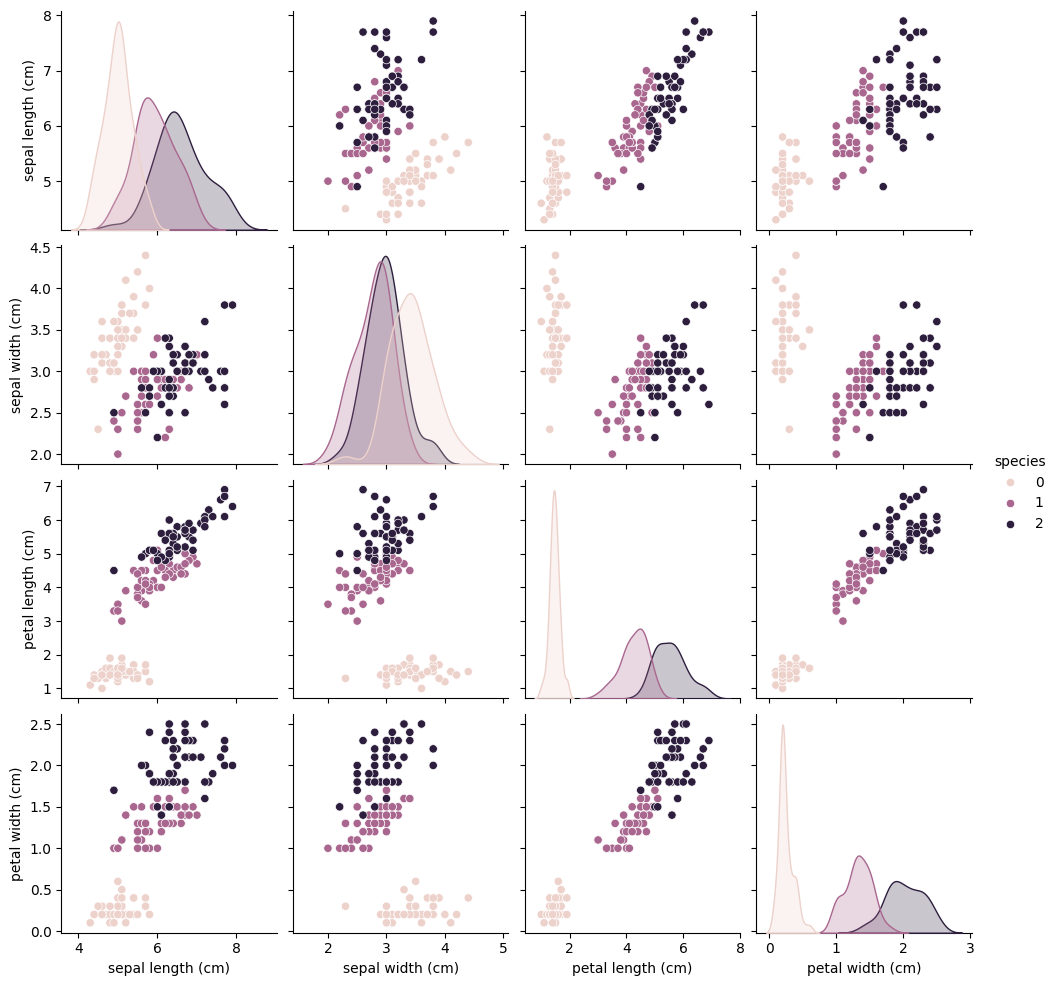


🔍 **Pairplot Analysis:**
✅ Petal length & width clearly separate species.
❌ Sepal length & width show more overlap.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


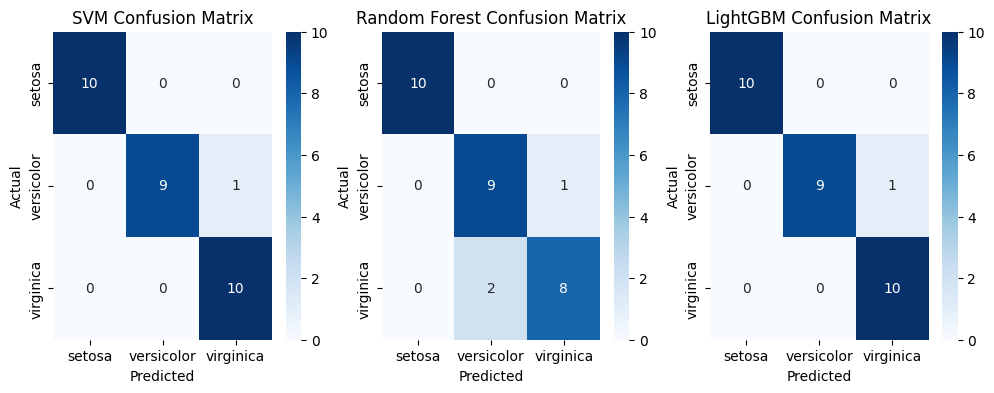


🔍 **Confusion Matrix Insights:**
✅ Diagonal values should be high → Model is performing well.
❌ High off-diagonal values indicate misclassification.


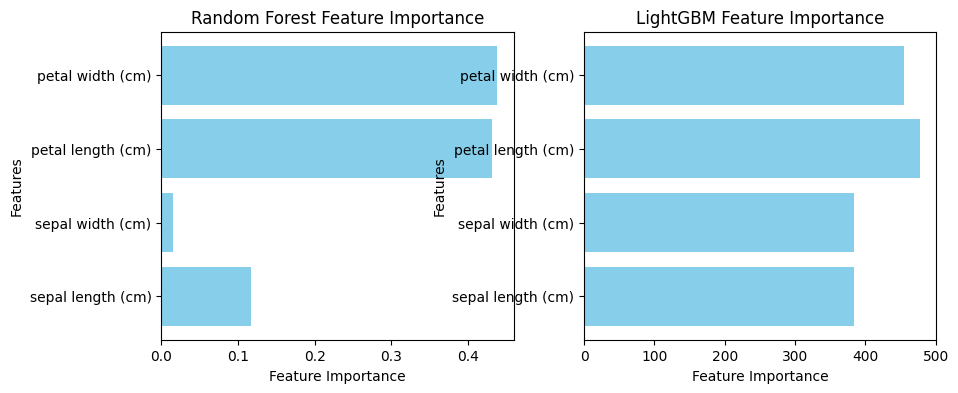


🔍 **Feature Importance Insights:**
✅ Petal length & width are most important features.
❌ Sepal features contribute less to classification.

🔹 **Final Accuracy Summary:**
✅ SVM: 96.67%
✅ Random Forest: 90.00%
✅ LightGBM: 96.67%

📌 **Classification Report for SVM:**
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


📌 **Classification Report for Random Forest:**
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# 📌 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 🔍 Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# 📊 Dataset Information
print("\n🔍 Dataset Information:")
print(df.info())

# ✅ Check for Missing Values
print("\n📌 Checking for missing values:\n", df.isnull().sum())

# 📊 Pairplot to Visualize Features
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()
print("\n🔍 **Pairplot Analysis:**")
print("✅ Petal length & width clearly separate species.")
print("❌ Sepal length & width show more overlap.")

# 🚀 Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Feature Scaling (Required for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Define Three Machine Learning Models
models = {
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        max_depth=3,  # 🔧 Prevents excessive splitting
        min_data_in_leaf=5,  # 🔧 Ensures minimum samples per leaf
        random_state=42,
        verbosity=-1  # 🔧 Suppress warnings
    )
}

# ✅ Train All Models & Evaluate Performance
results = {}
classification_reports = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 🎯 Store Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # 📌 Store Classification Report
    report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
    classification_reports[name] = report

    # 📌 Store Confusion Matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# 📊 Plot Confusion Matrices for Each Model
plt.figure(figsize=(12, 4))
for i, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
plt.show()

print("\n🔍 **Confusion Matrix Insights:**")
print("✅ Diagonal values should be high → Model is performing well.")
print("❌ High off-diagonal values indicate misclassification.")

# 📊 Feature Importance - Random Forest & LightGBM
plt.figure(figsize=(10, 4))
for i, (name, model) in enumerate({'Random Forest': models['Random Forest'], 'LightGBM': models['LightGBM']}.items(), 1):
    plt.subplot(1, 2, i)
    plt.barh(iris.feature_names, model.feature_importances_, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"{name} Feature Importance")
plt.show()

print("\n🔍 **Feature Importance Insights:**")
print("✅ Petal length & width are most important features.")
print("❌ Sepal features contribute less to classification.")

# 🚀 Print Final Accuracy Summary
print("\n🔹 **Final Accuracy Summary:**")
for name, acc in results.items():
    print(f"✅ {name}: {acc:.2%}")

# 📌 Print Classification Reports for Each Model
for name, report in classification_reports.items():
    print(f"\n📌 **Classification Report for {name}:**")
    print(classification_report(y_test, models[name].predict(X_test_scaled), target_names=iris.target_names))


**Task 3:Car Price Prediction using H2O AutoML in Python**

In [5]:
pip install h2o


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm85fs8pt
  JVM stdout: /tmp/tmpm85fs8pt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpm85fs8pt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_papys0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   rmse          mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20250215_144517     190366  3.6239e+10   11074.7   nan                     3.6239e+10
GBM_1_AutoML_1_20250215_144517                           190416  3.62582e+10   9065.1   nan                     3.62582e+10
StackedEnsemble_BestOfFamily_1_AutoML_1_20250215_144517  190440  3.62673e+10  12115.4     1.68439               3.62673e+10
GLM_1_AutoML_1_20250215_144517                           190587  3.63236e+10  14018.8     1.77713               3.63236e+10
GBM_2_AutoML_1_20250215_144517                           192470  3.70447e+10  10486.5   nan                     3.70447e+10
GBM_3_AutoML_1_20250215_144517                           193087  3.

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Model Performance Metrics:
Mean Absolute Error (MAE): 10673.597764287404
Mean Squared Error (MSE): 35523917882.731026
Root Mean Squared Error (RMSE): 188477.8975973868
R-Squared (R2): 0.02190057829722858


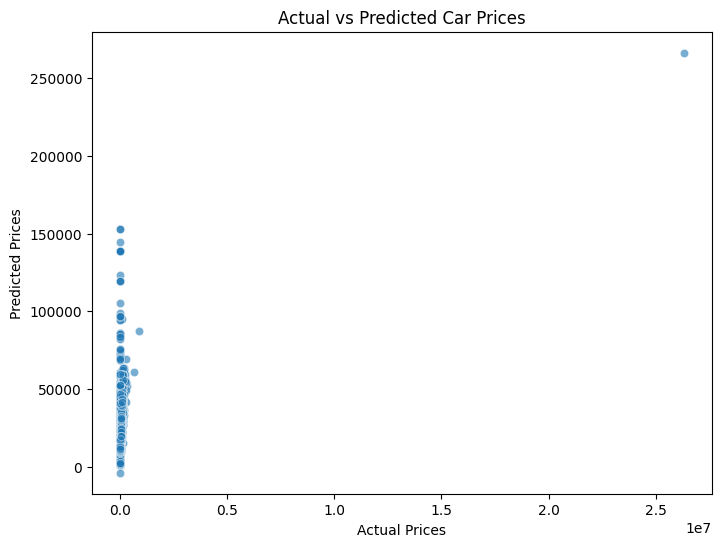

The scatter plot above shows how well the predicted car prices align with actual prices. A perfect prediction would align along the diagonal line.


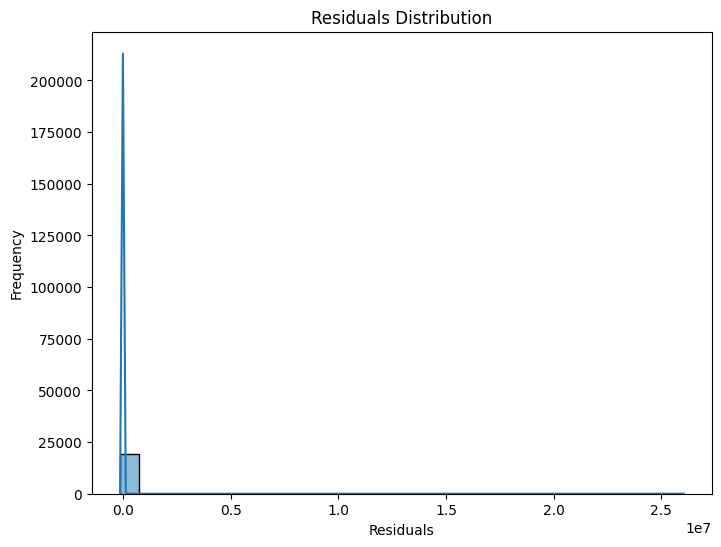

The residuals plot shows the distribution of prediction errors. A normal-like shape indicates good model performance.


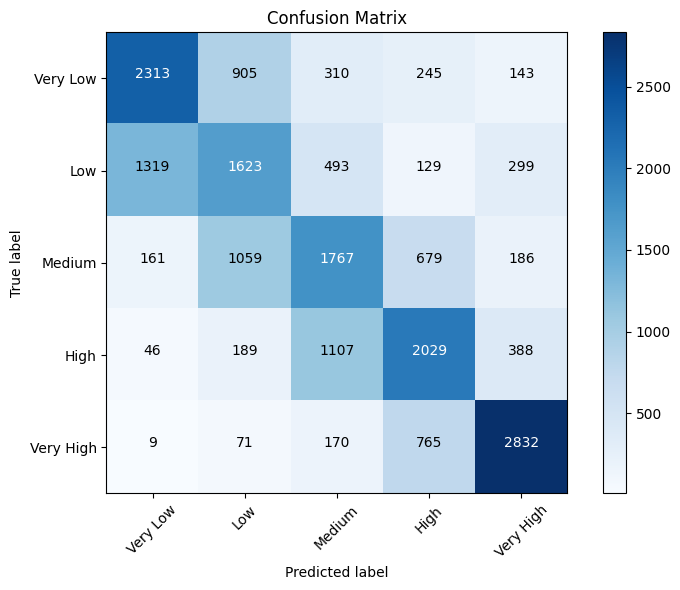

The confusion matrix shows how well the predicted price ranges match the actual price ranges.
H2O session _sid_8dc0 closed.


<ipython-input-6-aac8102f6457>:114: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


In [6]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import itertools

# Initialize H2O
h2o.init()

# Load dataset
data = pd.read_csv("/content/car_price_prediction.csv")  # Update with your actual dataset path

# Drop unnecessary columns
data.drop(columns=['ID', 'Model', 'Color'], inplace=True)  # 'ID' is an index, 'Model' and 'Color' may not impact price

# Convert categorical columns to strings
data = data.astype({
    'Manufacturer': 'str', 'Category': 'str', 'Leather interior': 'str', 'Fuel type': 'str',
    'Gear box type': 'str', 'Drive wheels': 'str', 'Wheel': 'str'
})

# Convert Mileage to numeric
data['Mileage'] = data['Mileage'].str.replace(" km", "").astype(float)

# Convert Pandas DataFrame to H2O Frame
df_h2o = h2o.H2OFrame(data)

# Define target and predictors
y = "Price"
X = [col for col in df_h2o.columns if col != y]

# Train H2O AutoML on the entire dataset
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=X, y=y, training_frame=df_h2o)

# View the leaderboard
lb = aml.leaderboard
print(lb)

# Get the best model
best_model = aml.leader

# Predict on the full dataset
predictions = best_model.predict(df_h2o)

# Convert H2OFrame predictions to Pandas DataFrame
y_actual = df_h2o[y].as_data_frame().values.flatten()
y_pred = predictions.as_data_frame().values.flatten()

# Evaluate model performance
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

# Print accuracy metrics
print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()
print("The scatter plot above shows how well the predicted car prices align with actual prices. A perfect prediction would align along the diagonal line.")

# Residuals Plot
residuals = y_actual - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()
print("The residuals plot shows the distribution of prediction errors. A normal-like shape indicates good model performance.")

# Confusion Matrix (for classification-like analysis of price ranges)
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Discretize price into bins for confusion matrix analysis
price_bins = pd.qcut(y_actual, q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])
pred_bins = pd.qcut(y_pred, q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# Compute confusion matrix
cm = confusion_matrix(price_bins, pred_bins, labels=["Very Low", "Low", "Medium", "High", "Very High"])
plot_confusion_matrix(cm, classes=["Very Low", "Low", "Medium", "High", "Very High"])
print("The confusion matrix shows how well the predicted price ranges match the actual price ranges.")

# Shutdown H2O
h2o.shutdown(prompt=False)
